Importing libraries


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [61]:
mydata = pd.read_csv('/content/SVMtrain.csv')

In [62]:
mydata.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [63]:
mydata['Age'].value_counts()

Age
60.00    181
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
0.92       1
23.50      1
55.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [64]:
 mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [65]:
mydata.shape

(889, 9)

In [66]:
mydata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [67]:
mydata.isnull().sum() #there are no missing values

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [68]:
survived_data = mydata[mydata['Survived'] == 1]     #To know the total passengeers and survivors
total_counts = mydata.shape[0]
total_entries_survived = survived_data.shape[0]

print("Total Passengers")
print(total_counts)
print(" ")
print("Survivors")
print(total_entries_survived)

Total Passengers
889
 
Survivors
340


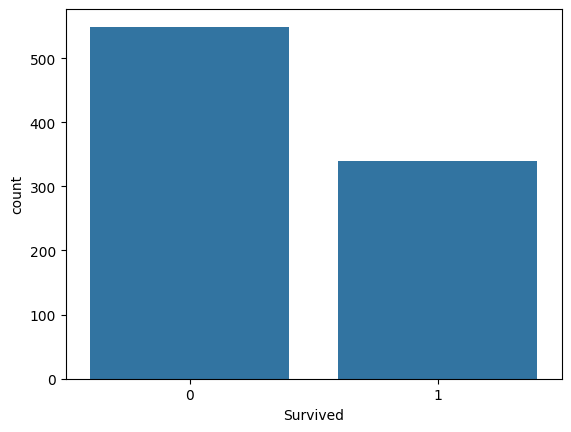

In [69]:
sns.countplot(mydata,x='Survived')     #0 - Survived , 1 - Didn't Survived
plt.show()

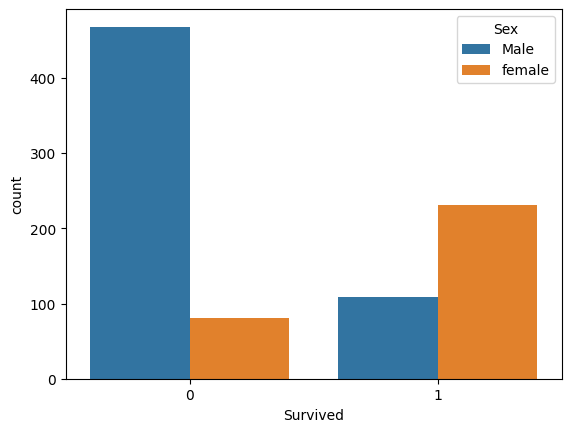

In [70]:
sns.countplot(mydata,x='Survived',hue='Sex') #0 - Survived , 1 - Didn't Survived
plt.show()

In [71]:
pd.crosstab(mydata['Pclass'],mydata['Survived'], margins= True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,134,214
2,97,87,184
3,372,119,491
All,549,340,889


In [72]:
mydata['Sex'].replace(['Male','female'],[0,1],inplace= True)   #replacing 'sex' column into 0's and 1's

In [73]:
mydata.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3


Applying ML Algorithms

In [74]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:
y = mydata['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [36]:
X = mydata
X

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,0,27.0,0,0,13.0000,3
885,888,1,1,1,19.0,0,0,30.0000,3
886,889,0,3,1,60.0,1,2,23.4500,3
887,890,1,1,0,26.0,0,0,30.0000,1


In [37]:
model = RandomForestClassifier()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [39]:
X_train.shape,X_test.shape

((666, 9), (223, 9))

In [40]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
model.score(X_test, y_test)

1.0

In [75]:
from sklearn.ensemble import RandomForestClassifier #I have applied randomforest , svm and knn algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [44]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [45]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [57]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest' ],
    'Score': [acc_linear_svc, acc_knn,
              acc_random_forest, ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(4)

,Model
Score,
100.00,Support Vector Machines
100.00,Random Forest
78.83,KNN
